<a href="https://colab.research.google.com/github/nayrr25/Aplicaciones-Financieras-e-IA/blob/main/Examen_2_semana8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examen 2.
Nancy Raquel Rodríguez Ramos

# Prediccion con LSTM de los tipos de cambio


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MaxMitre/Aplicaciones-Financieras/blob/main/Semana7/1_Manejo_de_portafolios_Markovitz.ipynb)

In [ ]:

!pip install yfinance


In [ ]:
#Paquetes
import yfinance as yf
import pandas as pd

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from keras import layers

import plotly.graph_objects as go

In [ ]:
def evaluate_model(estimator, train, val, test):
    print('train cross_entropy = ', estimator.evaluate(train[0], train[1], verbose = False))
    print('  val cross_entropy = ', estimator.evaluate(val[0], val[1], verbose = False))
    print(' test cross_entropy = ', estimator.evaluate(test[0], test[1], verbose = False))

## 1. Descargue datos del precio del dólar en pesos mexicanos, use Yahoo Finance.

In [ ]:

# Define el símbolo del par de divisas para el dólar en pesos mexicanos
symbol = 'USDMXN=X'

# Descarga los datos históricos
df = yf.download(symbol, period="1y", interval = "1d",)
data=df.copy()

In [ ]:
data

In [ ]:
data= pd.DataFrame(data)
data

# 2. Proponer una red de arquitectura LSTM que realice una predicción (forecast) de la serie de tiempo anterior.

In [ ]:
 #Cargar tus datos de serie de tiempo
# Por ejemplo, asumiendo que tienes un DataFrame llamado 'data' con una columna 'precio_dolar_mxn'

# Preprocesar los datos
data = data[['Adj Close']]  # Seleccione la columna de interés
scaler = MinMaxScaler()
data['Adj Close'] = scaler.fit_transform(data[['Adj Close']])



In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(len(data) * 0.8)
train_data, test_data = data.iloc[:train_size], data.iloc[train_size:]

In [ ]:
# Crear secuencias de tiempo para entrenamiento y prueba
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data.iloc[i:i+seq_length].values
        sequences.append(seq)
    return np.array(sequences)

seq_length = 3  # Longitud de la secuencia de tiempo
X_train = create_sequences(train_data, seq_length)
y_train = train_data.iloc[seq_length:].values
X_test = create_sequences(test_data, seq_length)
y_test = test_data.iloc[seq_length:].values



In [ ]:
# Construir el modelo LSTM
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')



In [ ]:
# Entrenar el modelo
model.fit(X_train, y_train, epochs=101, batch_size=100)

In [ ]:
# Evaluar el modelo en el conjunto de prueba
test_loss = model.evaluate(X_test, y_test)
print(f'Loss en el conjunto de prueba: {test_loss}')

In [ ]:
# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test)

In [ ]:
# Visualizar las predicciones
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(y_test), label='Datos reales')
plt.plot(scaler.inverse_transform(predictions), label='Predicciones')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Precio del dólar en pesos mexicanos')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

# Entrenar el modelo (asumiendo que ya lo has entrenado)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')


## ¿Es posible mejorar los resultados de un modelo ARIMA?

In [ ]:
#Análisis de series

In [ ]:

!pip install pmdarima

In [ ]:

!pip install arch

In [ ]:
from pmdarima.arima import auto_arima
import arch

In [ ]:
# Cargar los datos históricos
symbol = 'USDMXN=X'
df = yf.download(symbol, period="1y", interval="1d")

# Seleccionar la columna de interés (Precio de cierre ajustado)
data = df[['Adj Close']]

# Normalizar los datos entre 0 y 1
scaler = MinMaxScaler()
data['Adj Close'] = scaler.fit_transform(data[['Adj Close']])

In [ ]:
data

In [ ]:
data.info()

In [ ]:
data['Adj Close'].plot(figsize=(10,4), title='Precios Pesos', ylabel = 'Precio',)
plt.show()

In [ ]:

# p-valor para ver si serie es estacionaria
# ¿La serie es estacionaria?
p_value = adfuller(data['Adj Close'])[1]
print(p_value)

# Interpretación del p-valor
if p_value <= 0.05:
    print("La serie es estacionaria (rechazamos la hipótesis nula)")
else:
    print("La serie no es estacionaria (no podemos rechazar la hipótesis nula)")

In [ ]:
data['Prices_log'] = np.log(data['Adj Close'])
data['Prices_log'].plot(figsize=(10,4), title='Transformación logaritmica del peso mexicano', ylabel = 'Precio',)
plt.show()

In [ ]:
import pandas as pd

# Supongamos que 'data' contiene tu serie de precios en la columna 'Prices_log'

# Calcular los retornos logarítmicos y agregarlos como una nueva columna
data['Retornos_log'] = data['Prices_log'].diff()

# Mantener el primer registro como NaN
data['Retornos_log'].iloc[0] = 0.0  # Opcionalmente, puedes establecerlo en 0 u otro valor adecuado

# Ver las primeras filas del DataFrame
data.head()


In [ ]:
data['Retornos_log'][1:].plot(figsize=(10,4), title='Retornos logaritmicos Pesos', ylabel = 'Retornos_log')
plt.show()


<ipython-input-162-5560afb2260b>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



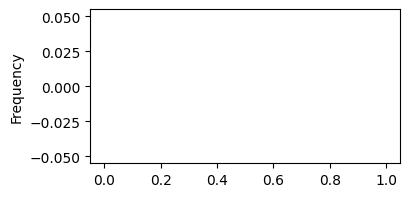

In [162]:
data['Prices_log'].dropna()  # Elimina NaN si los hay
data['Prices_log'] = data['Prices_log'][data['Prices_log'] > 0]  # Filtra valores positivos
data['Prices_log'].plot.hist(bins=60)
plt.show()

<ipython-input-163-5f6ee43bdd9b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



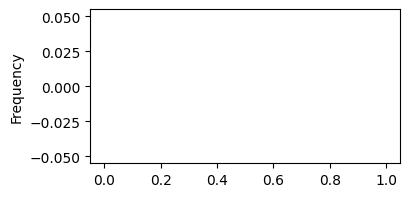

In [163]:
data['Prices_log'].replace([np.inf, -np.inf], 0, inplace=True)  # Reemplaza inf y -inf por 0
data['Prices_log'].plot.hist(bins=60)
plt.show()


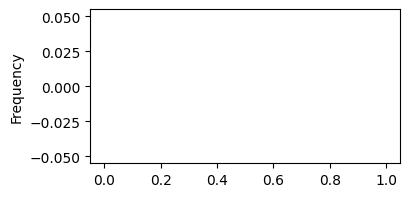

In [164]:
plt.rc("figure", figsize=(4,2))
data['Prices_log'].plot.hist(bins=60)
plt.show()

In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 263 entries, 2022-08-25 to 2023-08-27
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Adj Close     263 non-null    float64
 1   Prices_log    0 non-null      float64
 2   Retornos_log  262 non-null    float64
dtypes: float64(3)
memory usage: 8.2 KB


In [166]:
data['Prices_log'].fillna(0, inplace=True)  # Rellena NaN con 0
data['Retornos_log'] = data['Prices_log'].diff()

<ipython-input-166-501902de0310>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-166-501902de0310>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_base.py:2503: UserWarning:




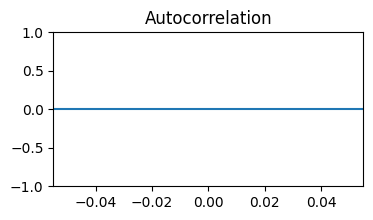

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Supongamos que 'data' contiene tu serie temporal en la columna 'Adj Close'

# Calcular y trazar la función de autocorrelación (ACF)
plot_acf(data['Retornos_log'], lags=150)
plt.show()


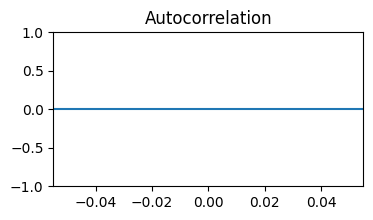

In [168]:
plot_acf(data['Retornos_log'], lags=50)
plt.show()

Si al graficar la función de autocorrelación (ACF) se obtiene una línea constante en y=0, significa que no hay una autocorrelación significativa en la serie de retornos, tomando en cuenta los retrasos que se analiza.

 Cada valor de la serie de retornos no está correlacionado con los valores anteriores o posteriores en los retrasos. Esto puede ser una señal de que la serie de retornos es esencialmente un proceso estocástico o ruido blanco, donde los valores son independientes entre sí y no hay patrones o tendencias detectables en la autocorrelación.

En términos prácticos, una ACF con una línea constante en y=0 sugiere que los retornos no tienen una dependencia lineal significativa en el tiempo.

En este contexto, es posible que no sea apropiado aplicar modelos ARIMA (Autoregressive Integrated Moving Average) o GARCH (Generalized Autoregressive Conditional Heteroskedasticity) para modelar la serie.

ARIMA: Los modelos ARIMA se utilizan para modelar series temporales que tienen autocorrelación significativa en los retrasos. Si la ACF no muestra autocorrelación, es poco probable que un modelo ARIMA sea efectivo, ya que estos modelos dependen de la autocorrelación para hacer pronósticos.

GARCH: Los modelos GARCH se utilizan para modelar la volatilidad condicional en series temporales financieras. Si bien no necesariamente requieren autocorrelación en los retornos, se centran en modelar la varianza condicional. Si la serie no muestra patrones significativos de volatilidad condicional (por ejemplo, cambios abruptos en la varianza), un modelo GARCH podría no ser necesario o útil.

# ¿Es posible utilizar redes neuronales recurrentes en lugar de un modelo ARCH?Intente implementarlo y observe los resultados.

In [ ]:
df

In [ ]:
# Cargar los datos históricos
symbol = 'USDMXN=X'
df = yf.download(symbol, period="1y", interval="1d")

# Seleccionar la columna de interés (Precio de cierre ajustado)
data = df[['Adj Close']]

# Normalizar los datos entre 0 y 1
scaler = MinMaxScaler()
data['Adj Close'] = scaler.fit_transform(data[['Adj Close']])

In [ ]:
data=pd.DataFrame(data)

In [ ]:
data['Adj Close'].plot(figsize=(10,4), title='Precios Pesos', ylabel = 'Precio',)
plt.show()

In [ ]:
from pandas.util._decorators import Appender

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_process import ArmaProcess          # para simular proceso ARMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
# p-valor para ver si serie es estacionaria
# ¿La serie es estacionaria?
p_value = adfuller(data['Adj Close'])[1]
print(p_value)

## Transformación y División

In [ ]:
# Supongamos que 'data' contiene tus datos preprocesados de tipo de cambio
# Define la longitud de la secuencia de tiempo
seq_length = 3  # Puedes ajustar esto según tus necesidades

# Crear secuencias de tiempo para entrenamiento
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:i+seq_length].values)
        y.append(data.iloc[i+seq_length].values)
    return np.array(X), np.array(y)

X, y = create_sequences(data, seq_length)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Supongamos que 'data' contiene tus datos preprocesados de tipo de cambio

# División de datos en conjuntos de entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.8, random_state=10, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, train_size=0.5, random_state=10, shuffle=False)

# Ahora tienes X_train, y_train para entrenamiento
# X_val, y_val para validación
# X_test, y_test para pruebas

## Redes Neuronales

In [ ]:
earlystop_cb = keras.callbacks.EarlyStopping(
    patience = 25,
    restore_best_weights = True
)

In [ ]:
# Define la dimensión de fusión
fusion_dim = 8

# Definición de la entrada de precio
price_input = layers.Input(shape=(seq_length, 1), name='price_input')  # La entrada es una secuencia de longitud seq_length

# Definición de la capa LSTM
lstm_layer = layers.LSTM(fusion_dim, name='lstm')(price_input)

# Definición de la capa de predicción
prediction_layer = keras.models.Sequential([
    layers.Dense(8, activation='tanh'),
    layers.Dense(8, activation='relu'),
    layers.Dense(8, activation='sigmoid'),
    layers.Dense(1, activation='linear')  # Se ajusta a la regresión, si es clasificación, cambia la activación y la dimensión de salida
], name='prediction')

# Salida de predicción
prediction_output = prediction_layer(lstm_layer)

# Creación del modelo
model = keras.Model(inputs=[price_input], outputs=prediction_output)

# Compilación del modelo
model.compile(optimizer='adam', loss='mean_squared_error')  # Cambié la pérdida a 'mean_squared_error' para la regresión

# Resumen del modelo
model.summary()

In [ ]:
model_2 = keras.Model([price_input], prediction_output)

model_2.compile(
    loss = 'categorical_crossentropy'
)

model_2.summary()

# Visualization

In [ ]:
# Visualización del modelo
keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TD",
    dpi=100,
)

In [ ]:
history = model.fit(
    X_train, y_train,
    batch_size = 100,
    epochs = 100,  # Valor real de 1000
    callbacks = [earlystop_cb],
    validation_data = [X_val, y_val]
).history

In [ ]:
x = list(range(len(history['loss'])))

fig = go.Figure()

fig.add_trace(go.Scatter(x = x, y = history['loss'])) \
   .add_trace(go.Scatter(x = x, y = history['val_loss']))

fig.show()

In [ ]:
evaluate_model(model, [X_train, y_train], [X_val, y_val], [X_test, y_test])

In [ ]:
model.save('best_model.h5')

In [ ]:
best_model = keras.models.load_model('best_model.h5')
best_model.summary()

In [ ]:
from sklearn.metrics import mean_squared_error
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Cree un portafolio que invierta en distintas divisas (divisas a su elección), ¿Qué método utilizó y qué criterio lo hizo decantarse por algún portafolio?

Primero leo cuales son todas las divisas que existen en la página de Yahoo Finance, de la siguiente manera:

In [ ]:
import requests
from bs4 import BeautifulSoup

# URL de Yahoo Finance que muestra los símbolos de divisas
url = 'https://finance.yahoo.com/currencies/'

# Realizar una solicitud GET a la página
response = requests.get(url)

# Comprobar si la solicitud se realizó con éxito
if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    currencies = []

    # Buscar la tabla que contiene los símbolos de divisas
    table = soup.find('table', {'class': 'W(100%)'})

    # Iterar a través de las filas de la tabla
    for row in table.find_all('tr')[1:]:  # Ignoramos la primera fila que contiene encabezados
        currency_symbol = row.find_all('td')[0].text
        currencies.append(currency_symbol)

    print(currencies)
else:
    print("No se pudo obtener la lista de divisas.")



# Cree otro portafolio y muestre cómo se desempeñan ambos portafolios en un periodo de tiempo (es decir, escoja un portafolio y grafique cómo se modifica el valor de su inversión, diario, durante un año)

A apartir de los anterior, creo un portafolio

In [ ]:
CURRENCY_LIST= currencies

In [170]:
import pandas as pd
import yfinance as yf

# Definir el período de tiempo
start_date = "2013-08-24"  # Hace tres años desde la fecha actual
end_date = "2023-08-24"  # Fecha actual

# Obtener la lista de símbolos de divisas disponibles en Yahoo Finance
divisas = yf.download(CURRENCY_LIST, start=start_date, end=end_date)["Adj Close"].columns.tolist()

# Crear un DataFrame para almacenar los datos de rendimiento
df = pd.DataFrame()

# Obtener los datos de Yahoo Finance para cada divisa y guardarlos en el DataFrame
for divisa in divisas:
    data = yf.download(divisa, start=start_date, end=end_date)
    df[divisa] = data["Adj Close"]

# Calcular los rendimientos diarios
daily_returns = df.pct_change().dropna()

# Calcular el rendimiento promedio del último año para cada divisa
average_returns = daily_returns.mean() * 252  # Se asume 252 días hábiles en un año

# Ordenar las divisas por rendimiento promedio descendente
sorted_returns = average_returns.sort_values(ascending=False)

# Mostrar las divisas con los mejores rendimientos
print("Divisas con los mejores rendimientos en este período:")
print(sorted_returns)


[*********************100%%**********************]  23 of 23 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*****

A partir de eso, creo un df que contenga las columnas Adj Close de cada una de las 5 divisas que tienen mejor promedio de los últimos 10 años

In [171]:
data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "RUB=X ZAR=X IDR=X JPY=X MYR=X",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "1y",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        # group_by = 'ticker',
    ).loc[:, 'Adj Close']
data

[*********************100%%**********************]  5 of 5 completed


,IDR=X,JPY=X,MYR=X,RUB=X,ZAR=X
Date,,,,,
2022-08-29,14811.000000,137.520004,4.4650,60.264999,16.911249
2022-08-30,14895.000000,138.595993,4.4795,61.715000,16.809641
2022-08-31,14850.000000,138.733994,4.4740,59.965000,16.957800
2022-09-01,14855.000000,139.296005,4.4735,60.090000,17.105209
2022-09-02,14902.099609,140.080994,4.4785,60.174999,17.251900
...,...,...,...,...,...
2023-08-22,15318.900391,146.238007,4.6465,93.464996,18.940001
2023-08-23,15317.000000,145.763000,4.6460,94.464996,18.769951
2023-08-24,15294.099609,144.673004,4.6460,94.966003,18.454100


In [172]:
closing_prices=data.copy()
closing_prices

,IDR=X,JPY=X,MYR=X,RUB=X,ZAR=X
Date,,,,,
2022-08-29,14811.000000,137.520004,4.4650,60.264999,16.911249
2022-08-30,14895.000000,138.595993,4.4795,61.715000,16.809641
2022-08-31,14850.000000,138.733994,4.4740,59.965000,16.957800
2022-09-01,14855.000000,139.296005,4.4735,60.090000,17.105209
2022-09-02,14902.099609,140.080994,4.4785,60.174999,17.251900
...,...,...,...,...,...
2023-08-22,15318.900391,146.238007,4.6465,93.464996,18.940001
2023-08-23,15317.000000,145.763000,4.6460,94.464996,18.769951
2023-08-24,15294.099609,144.673004,4.6460,94.966003,18.454100


In [173]:
closing_prices.shift()
#Sirve para desplazar un período +1 hacia adelante

,IDR=X,JPY=X,MYR=X,RUB=X,ZAR=X
Date,,,,,
2022-08-29,NaN,NaN,NaN,NaN,NaN
2022-08-30,14811.000000,137.520004,4.4650,60.264999,16.911249
2022-08-31,14895.000000,138.595993,4.4795,61.715000,16.809641
2022-09-01,14850.000000,138.733994,4.4740,59.965000,16.957800
2022-09-02,14855.000000,139.296005,4.4735,60.090000,17.105209
...,...,...,...,...,...
2023-08-22,15278.000000,145.304993,4.6450,95.165001,18.967199
2023-08-23,15318.900391,146.238007,4.6465,93.464996,18.940001
2023-08-24,15317.000000,145.763000,4.6460,94.464996,18.769951


In [174]:
annual_returns = np.log(closing_prices / closing_prices.shift()) / (1 / 252) # Para anualizar los retornos, los días hábiles cuando se abre la plataforma son 252
annual_returns

,IDR=X,JPY=X,MYR=X,RUB=X,ZAR=X
Date,,,,,
2022-08-29,NaN,NaN,NaN,NaN,NaN
2022-08-30,1.425170,1.964034,0.817020,5.991431,-1.518665
2022-08-31,-0.762482,0.250792,-0.309591,-7.249021,2.211380
2022-09-01,0.084834,1.018790,-0.028176,0.524760,2.181100
2022-09-02,0.797733,1.416134,0.281508,0.356210,2.151881
...,...,...,...,...,...
2023-08-22,0.673722,1.612937,0.081372,-4.542361,-0.361625
2023-08-23,-0.031264,-0.819871,-0.027130,2.681875,-2.272759
2023-08-24,-0.377046,-1.891504,0.000000,1.332982,-4.276612


In [175]:
#la media de los retornos anuales
mean_returns = annual_returns.mean()
mean_returns

IDR=X    0.030786
JPY=X    0.060926
MYR=X    0.037262
RUB=X    0.440877
ZAR=X    0.091591
dtype: float64

In [176]:
#covarianza de los retornos anuales de diferentes acciones
cov_returns = annual_returns.cov()
cov_returns

,IDR=X,JPY=X,MYR=X,RUB=X,ZAR=X
IDR=X,1.329796,0.957083,0.251206,-7.178763,0.906728
JPY=X,0.957083,3.621951,0.311313,9.497818,1.841054
MYR=X,0.251206,0.311313,0.984457,3.170148,0.067240
RUB=X,-7.178763,9.497818,3.170148,3655.774641,-10.817229
ZAR=X,0.906728,1.841054,0.067240,-10.817229,5.845291


In [177]:
correlation_matrix = annual_returns.corr()
correlation_matrix

,IDR=X,JPY=X,MYR=X,RUB=X,ZAR=X
IDR=X,1.000000,0.436100,0.219553,-0.102960,0.325223
JPY=X,0.436100,1.000000,0.164865,0.082540,0.400122
MYR=X,0.219553,0.164865,1.000000,0.052843,0.028030
RUB=X,-0.102960,0.082540,0.052843,1.000000,-0.073999
ZAR=X,0.325223,0.400122,0.028030,-0.073999,1.000000


In [178]:
mean_returns

IDR=X    0.030786
JPY=X    0.060926
MYR=X    0.037262
RUB=X    0.440877
ZAR=X    0.091591
dtype: float64

#Con el método de Markovitz analizo posibles composiciones del portafolio

In [179]:
#creo una cantidad de matrices de 6*6 con zeros
#los weights2 es una matriz que contiene solo unos en la diagonal y el resto zeros y tamb de tamaño 6*6
np.random.seed(1995)

N = 10000
#N = 6  ##seis muestras

k = annual_returns.shape[1]

weights = np.zeros((N, k))
returns = np.zeros(N)
volatilities = np.zeros(N)
sharpe_ratios = np.zeros(N)

weights2 = np.array([[1,0,0,0,0],
                     [0,1,0,0,0],
                     [0,0,1,0,0],
                     [0,0,0,1,0],
                     [0,0,0,0,1]])

weights2.shape

(5, 5)

In [180]:
weights2.shape

(5, 5)

In [181]:
k

5

In [182]:
for i in range(N):
    w = np.random.random(k)
    w /= np.sum(w)

    #w = weights2[i]  ##
    #weights[i, :] = weights2[i]  ##

    weights[i, :] = w

    returns[i] = np.dot(mean_returns, w)

    volatilities[i] = np.sqrt(np.dot(w.T, np.dot(cov_returns, w))) # w.T @ cov_returns @ w

    sharpe_ratios[i] = returns[i] / volatilities[i]

In [183]:
import matplotlib.pyplot as plt
import plotly.express as px

px.scatter(x = volatilities, y = returns, color = sharpe_ratios,
           labels={
                     "x": "Volatilidad",
                     "y": "Retorno",
                     "color": "Razón de Sharpe"
                 }
           )
#plt.scatter(volatilities, returns, c = sharpe_ratios)

## Optimización de portafolio

In [184]:
mu_star = .1

In [185]:
import cvxopt as opt
G = opt.matrix(-np.concatenate([mean_returns.to_numpy().reshape(1, k),np.eye(k)]), tc = 'd')
h = opt.matrix(np.concatenate([np.array([-mu_star]).reshape((1, 1)), np.zeros((k, 1))]), tc = 'd')
q = opt.matrix(0.0, (k, 1))
A = opt.matrix(1.0, (1, k))
b = opt.matrix(1.0)
P = opt.matrix(2 * cov_returns.to_numpy(), tc = 'd')

In [186]:
P, q, G, h, A, b

(<5x5 matrix, tc='d'>,
 <5x1 matrix, tc='d'>,
 <6x5 matrix, tc='d'>,
 <6x1 matrix, tc='d'>,
 <1x5 matrix, tc='d'>,
 <1x1 matrix, tc='d'>)

In [187]:
results = opt.solvers.qp(P, q, G, h, A, b)
results

     pcost       dcost       gap    pres   dres
 0:  6.8589e-01 -3.3972e-01  1e+01  3e+00  4e+00
 1:  7.1629e-01  9.7576e-02  1e+00  2e-01  2e-01
 2:  7.7775e-01  1.1135e+00  9e-01  1e-01  2e-01
 3:  5.1818e+00  1.2079e+00  6e+00  5e-02  7e-02
 4:  5.4921e+00  4.2211e+00  3e+00  3e-02  4e-02
 5:  6.4368e+00  6.2254e+00  1e+00  9e-03  1e-02
 6:  7.1150e+00  7.0749e+00  2e-01  7e-04  1e-03
 7:  7.1771e+00  7.1766e+00  2e-03  7e-06  1e-05
 8:  7.1777e+00  7.1777e+00  2e-05  7e-08  1e-07
 9:  7.1777e+00  7.1777e+00  2e-07  7e-10  1e-09
Optimal solution found.


{'x': <5x1 matrix, tc='d'>,
 'y': <1x1 matrix, tc='d'>,
 's': <6x1 matrix, tc='d'>,
 'z': <6x1 matrix, tc='d'>,
 'status': 'optimal',
 'gap': 1.8191823359376393e-07,
 'relative gap': 2.5344995081365483e-08,
 'primal objective': 7.1776788351905125,
 'dual objective': 7.177678788642437,
 'primal infeasibility': 7.442612312617495e-10,
 'dual infeasibility': 1.1133196467253284e-09,
 'primal slack': 1.446108373794266e-11,
 'dual slack': 9.289785701553855e-08,
 'iterations': 9}

In [188]:
# impresion bonita de los numeros decimales
np.set_printoptions(suppress=True)

In [189]:
w = np.asarray(results['x']).reshape((-1))
w

array([0.        , 0.00000001, 0.        , 0.02407398, 0.97592601])

In [190]:
data.columns

Index(['IDR=X', 'JPY=X', 'MYR=X', 'RUB=X', 'ZAR=X'], dtype='object')

In [191]:
np.dot(mean_returns, w)

0.09999999971061777

La volatilidad de ```primal objective```

In [192]:
np.sqrt(results['primal objective'])

2.6791190408771524

Si variamos los retornos objetivos, podemos obtener la **Frontera Eficiente**, que esta constituida de los portafolios óptimos para distintos niveles del retorno.

In [193]:
mu_stars = np.linspace(.0, .29, 30)
mu_stars

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29])

In [194]:
G = opt.matrix(-np.concatenate([mean_returns.to_numpy().reshape(1, k),np.eye(k)]), tc = 'd')
q = opt.matrix(0.0, (k, 1))
A = opt.matrix(1.0, (1, k))
b = opt.matrix(1.0)
P = opt.matrix(2 * cov_returns.to_numpy(), tc = 'd')

mu_stars = np.linspace(.0, .29, 30)

ws = np.zeros((len(mu_stars), k))
mus = np.zeros(len(mu_stars))
sigmas = np.zeros(len(mu_stars))

for i, mu_star in enumerate(mu_stars):
    try:
        h = opt.matrix(np.concatenate([np.array([-mu_star]).reshape((1, 1)), np.zeros((k, 1))]), tc = 'd')
        results = opt.solvers.qp(P, q, G, h, A, b)

        w = np.asarray(results['x']).reshape((-1))
        ws[i, :] = w
        mus[i] = np.dot(mean_returns, w)
        sigmas[i] = np.sqrt(results['primal objective'])
    except:
        print('domain error')

     pcost       dcost       gap    pres   dres
 0:  6.8570e-01 -4.9354e-01  1e+00  2e-16  4e+00
 1:  6.7471e-01  6.2830e-01  5e-02  8e-18  1e-01
 2:  6.7150e-01  6.6932e-01  2e-03  2e-16  3e-03
 3:  6.7122e-01  6.7106e-01  2e-04  1e-16  3e-05
 4:  6.7121e-01  6.7121e-01  3e-06  6e-17  2e-07
 5:  6.7121e-01  6.7121e-01  3e-08  6e-17  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.8572e-01 -4.7906e-01  1e+00  4e-16  4e+00
 1:  6.7472e-01  6.2879e-01  5e-02  6e-17  1e-01
 2:  6.7150e-01  6.6932e-01  2e-03  6e-17  3e-03
 3:  6.7122e-01  6.7106e-01  2e-04  2e-16  3e-05
 4:  6.7121e-01  6.7121e-01  3e-06  2e-16  2e-07
 5:  6.7121e-01  6.7121e-01  3e-08  1e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.8574e-01 -4.6438e-01  1e+00  0e+00  4e+00
 1:  6.7473e-01  6.2929e-01  5e-02  1e-16  1e-01
 2:  6.7150e-01  6.6933e-01  2e-03  6e-17  3e-03
 3:  6.7122e-01  6.7106e-01  2e-04  1e-16  3e-05
 4:  6.7121e-01  6.7121e

Finalmente, podemos graficar la frontera eficiente. Se puede observar que, pese a que las simulaciones nos dieron portafolios a la frontera, no eran realmente óptimos.

In [195]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_traces(
    [
        go.Scatter(
            x = volatilities, y = returns,
            marker = dict(
                color = sharpe_ratios,
                colorbar = dict(title="Razón de Sharpe")
            ),
            mode = 'markers',
            showlegend = False
        ),
        go.Scatter(
            x = sigmas, y = mus,
            mode = 'lines + markers',
            showlegend = False
        )
])

fig.update_layout(
    xaxis_title = 'Volatilidad',
    yaxis_title = 'Retorno'
)



In [196]:
delta = .1

np.linalg.solve(delta * cov_returns,  mean_returns)

array([0.04410286, 0.05844005, 0.33592793, 0.0012337 , 0.12986353])

In [197]:
delta = .3

np.linalg.solve(delta * cov_returns,  mean_returns)

array([0.01470095, 0.01948002, 0.11197598, 0.00041123, 0.04328784])

# Elijo dos portafolios, a partir de un delta .1 y un delta .3 (donde delta se relaciona con la volatilidad ).


In [ ]:
data.columns

In [ ]:
pip install yfinance matplotlib


Por último, hago una simulación de qué hubiese ocurrido con mis rendimientos si hubiera invertido 100 dolares en cada uno de los portafolios hace un año.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


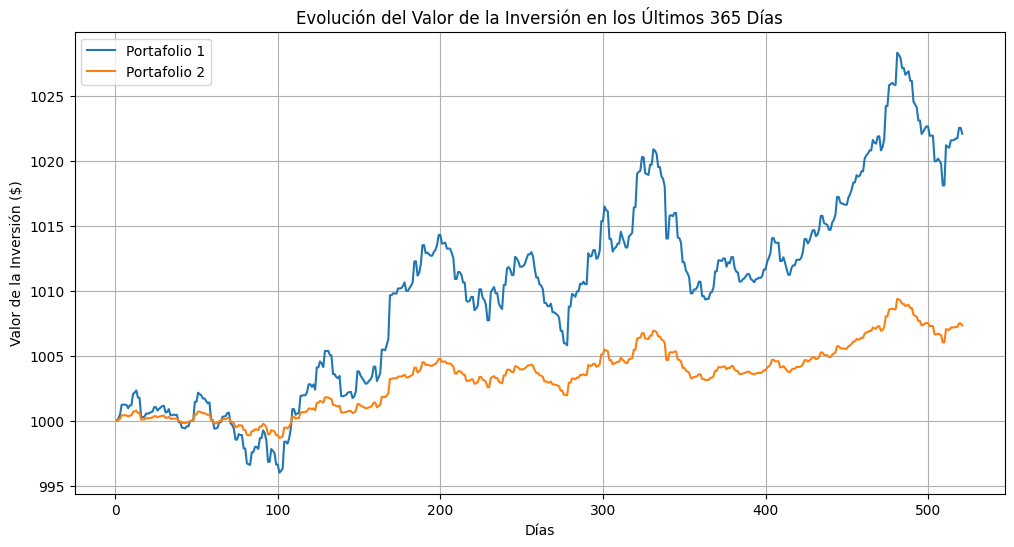

In [198]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Lista de símbolos de divisas en los portafolios
divisas = ['EURJPY=X', 'GBPJPY=X', 'JPY=X', 'PHP=X', 'RUB=X']

# Porcentajes de inversión en cada divisa para cada portafolio
porcentajes_portafolio1 = [0.04410286, 0.05844005, 0.33592793, 0.0012337 , 0.12986353]
porcentajes_portafolio2 = [0.01470095, 0.01948002, 0.11197598, 0.00041123, 0.04328784]

# Crear un DataFrame para almacenar los precios de cierre ajustados de las divisas
start_date = "2021-08-24"
end_date = "2023-08-24"
df = pd.DataFrame()

for divisa in divisas:
    data = yf.download(divisa, start=start_date, end=end_date)
    df[divisa] = data["Adj Close"]

# Calcular los rendimientos diarios de las divisas
daily_returns = df.pct_change().dropna()

# Calcular el valor de la inversión inicial de $1000 para cada portafolio
inversion_inicial = 1000
valor_inversion1 = [inversion_inicial]
valor_inversion2 = [inversion_inicial]

# Calcular el valor de la inversión para cada día del último año
for i in range(1, len(daily_returns)):
    for j, divisa in enumerate(divisas):
        valor_inversion1.append(valor_inversion1[-1] * (1 + porcentajes_portafolio1[j] * daily_returns[divisa][i]))
        valor_inversion2.append(valor_inversion2[-1] * (1 + porcentajes_portafolio2[j] * daily_returns[divisa][i]))

# Crear una lista de fechas o días basada en la longitud de los rendimientos diarios
dias = list(range(1, len(daily_returns) + 1))

# Asegurarse de que las listas de valor de inversión tengan la misma longitud que los días
valor_inversion1 = valor_inversion1[:len(daily_returns)]
valor_inversion2 = valor_inversion2[:len(daily_returns)]

# Graficar el valor de la inversión para ambos portafolios
plt.figure(figsize=(12, 6))
plt.plot(dias, valor_inversion1, label='Portafolio 1')
plt.plot(dias, valor_inversion2, label='Portafolio 2')
plt.xlabel('Días')
plt.ylabel('Valor de la Inversión ($)')
plt.title('Evolución del Valor de la Inversión en los Últimos 365 Días')
plt.legend()
plt.grid(True)
plt.show()


R/ El portafolio con la composición del delta .3 tiene rendimientos más bajos que el delta .1.
Probablemente, el .3 que era más riesgoso, obtuvo menos rendimientos altos en los últimos meses.